# Welcome to AI project! #

## Sentiment analysis tool that can understand positivity and negativity inside a piece of text! ##

In [1]:
# Install required libraries
print("📦 Installing AI libraries...")
try:
    import transformers
    print("✅ Transformers already installed!")
except ImportError:
    !pip install transformers torch
    print("✅ Libraries installed successfully!")

# Import everything we need
from transformers import pipeline
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

print("🚀 All set! Let's build some AI magic!")

📦 Installing AI libraries...
✅ Transformers already installed!
🚀 All set! Let's build some AI magic!


## Loading Pretrained distilbert-base-uncased-finetuned-sst-2-english model which can provide Positive and Negative sentiment ##

In [7]:
print("🤖 Loading pre-trained AI model...")
print("This model was trained on millions of text examples!")

# Load the sentiment analysis model
sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english" # Only this line needs to be changed on updating a model
)

print("✅ AI Model loaded successfully!")
print("💡 Fun fact: This model can understand positive and negative emotions in text!")

🤖 Loading pre-trained AI model...
This model was trained on millions of text examples!


Device set to use cpu


✅ AI Model loaded successfully!
💡 Fun fact: This model can understand positive and negative emotions in text!


In [6]:
result = sentiment_analyzer("Jai Shree Ram")
print(result)

[{'label': 'POSITIVE', 'score': 0.9970723390579224}]


In [7]:
result = sentiment_analyzer("I am having a lot of fun building a cool project usign AI!")
print(result)

[{'label': 'POSITIVE', 'score': 0.9997538924217224}]


## Loading Pretrained twitter-roberta-base-sentiment-latest model which can provide Positive, Neutral and Negative sentiment ##

In [10]:
print("🤖 Loading pre-trained AI model...")
print("This model was trained on millions of text examples!")

# Load the twitter-roberta-base-sentiment-latest sentiment model (3 labels: positive, negative, neutral)
multi_sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment-latest"
)

print("✅ AI Model loaded successfully!")
print("💡 Fun fact: This model can detect positive, negative, and neutral emotions in text!")


🤖 Loading pre-trained AI model...
This model was trained on millions of text examples!


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


✅ AI Model loaded successfully!
💡 Fun fact: This model can detect positive, negative, and neutral emotions in text!


In [11]:
result = multi_sentiment_analyzer("Jai Shree Ram")
print(result)

[{'label': 'positive', 'score': 0.8988016247749329}]


In [14]:
result = multi_sentiment_analyzer("I am having a lot of fun building a cool project usign AI!")
print(result)

[{'label': 'positive', 'score': 0.9891138076782227}]


In [78]:
result = multi_sentiment_analyzer("Catch me if you can")
print(result)
result = multi_sentiment_analyzer("Data Integration")
print(result)

[{'label': 'neutral', 'score': 0.7381724119186401}]
[{'label': 'neutral', 'score': 0.6621917486190796}]


In [16]:
result = multi_sentiment_analyzer("This is a very bad idea")
print(result)

[{'label': 'negative', 'score': 0.901631772518158}]


## BATCH PROCESSING: Analysis of Customer reviews and graph plotting ##

In [28]:
print("📊 BATCH PROCESSING: Analysis of Customer reviews")
print("="*60)

# Simulate customer reviews
customer_reviews = [
    "Best purchase ever! This product exceeded all my expectations!",
    "Terrible quality, broke after just one day. Very disappointed.",
    "Good value for money. Works as advertised, no complaints.",
    "Amazing customer service! They solved my issue immediately.",
    "Overpriced for what you get. Found better alternatives elsewhere.",
    "Fast shipping and great packaging. Product works perfectly!",
    "Instructions were confusing and setup was frustrating.",
    "Highly recommend this to anyone looking for quality!",
    "Mediocre product, nothing special but does the job.",
    "Outstanding quality and design! Worth every penny!",
    "I dont know if its bad",
    "Experience is good but overpriced",
    "Neutral",
    "Average",
    "Its ok",
    "Average product. must buy"
    "Higly recommend"
]

results = multi_sentiment_analyzer(customer_reviews) # batch processing

📊 BATCH PROCESSING: Analysis of Customer reviews


In [29]:
results

[{'label': 'positive', 'score': 0.9873982667922974},
 {'label': 'negative', 'score': 0.9453471899032593},
 {'label': 'positive', 'score': 0.9439191818237305},
 {'label': 'positive', 'score': 0.9686408638954163},
 {'label': 'negative', 'score': 0.6320202946662903},
 {'label': 'positive', 'score': 0.980535626411438},
 {'label': 'negative', 'score': 0.9050273299217224},
 {'label': 'positive', 'score': 0.9798077940940857},
 {'label': 'negative', 'score': 0.7319064140319824},
 {'label': 'positive', 'score': 0.9725354313850403},
 {'label': 'negative', 'score': 0.5527281761169434},
 {'label': 'positive', 'score': 0.4392629563808441},
 {'label': 'neutral', 'score': 0.5294666886329651},
 {'label': 'neutral', 'score': 0.522083580493927},
 {'label': 'neutral', 'score': 0.47435447573661804},
 {'label': 'positive', 'score': 0.8859077095985413}]

In [34]:
# Initialize counters
positive_count = 0
negative_count = 0
neutral_count = 0

for j, (review, result) in enumerate(zip(customer_reviews, results)):
    print(review, result)
    sentiment = result['label']
    confidence = result['score']

    if sentiment.upper() == "POSITIVE":
        positive_count += 1
        emoji = "😊"
    elif sentiment.upper() == "NEGATIVE":
        negative_count += 1
        emoji = "😡"
    else:
        neutral_count += 1
        emoji = "😐"

    print(f"{j+1:2d}. {emoji} {sentiment} ({confidence:.1%})")
    print(f"    {review[:60]}...")
    print()

# Business insights
total_reviews = len(customer_reviews)
positive_percentage = (positive_count / total_reviews) * 100
negative_percentage = (negative_count / total_reviews) * 100
neutral_percentage  = (neutral_count / total_reviews) * 100

print("\n📊 BUSINESS INSIGHTS:")
print(f" • Total Reviews: {total_reviews}")
print(f" • Positive: {positive_count} ({positive_percentage:.1f}%)")
print(f" • Negative: {negative_count} ({negative_percentage:.1f}%)")
print(f" • Neutral:  {neutral_count} ({neutral_percentage:.1f}%)")


Best purchase ever! This product exceeded all my expectations! {'label': 'positive', 'score': 0.9873982667922974}
 1. 😊 positive (98.7%)
    Best purchase ever! This product exceeded all my expectation...

Terrible quality, broke after just one day. Very disappointed. {'label': 'negative', 'score': 0.9453471899032593}
 2. 😡 negative (94.5%)
    Terrible quality, broke after just one day. Very disappointe...

Good value for money. Works as advertised, no complaints. {'label': 'positive', 'score': 0.9439191818237305}
 3. 😊 positive (94.4%)
    Good value for money. Works as advertised, no complaints....

Amazing customer service! They solved my issue immediately. {'label': 'positive', 'score': 0.9686408638954163}
 4. 😊 positive (96.9%)
    Amazing customer service! They solved my issue immediately....

Overpriced for what you get. Found better alternatives elsewhere. {'label': 'negative', 'score': 0.6320202946662903}
 5. 😡 negative (63.2%)
    Overpriced for what you get. Found better al

📊 CREATING VISUALIZATIONS


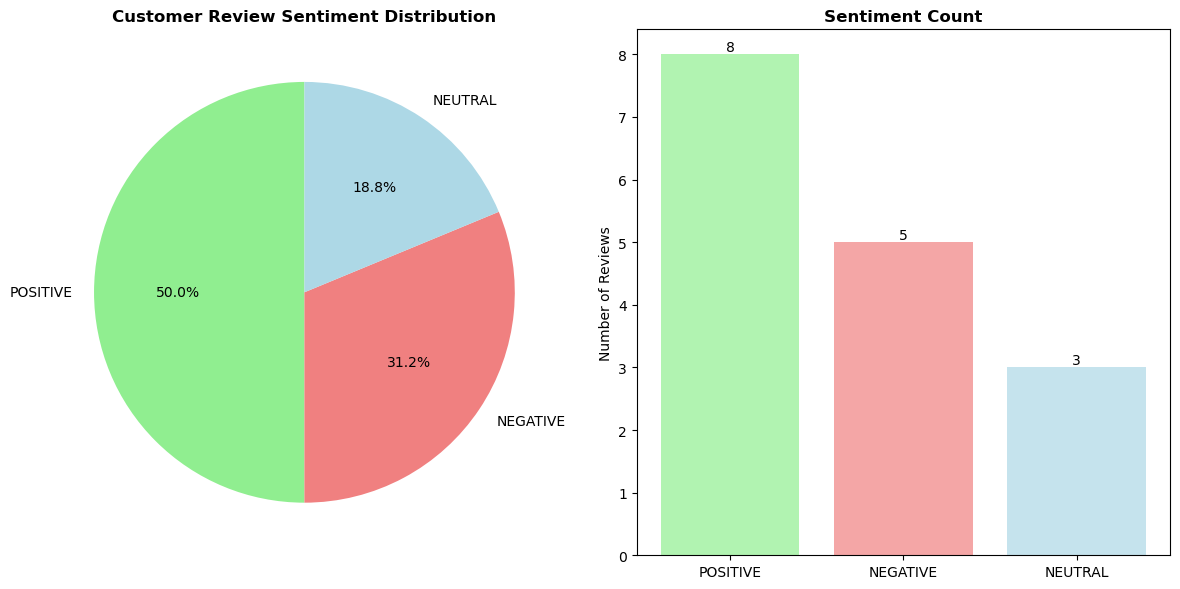

✅ Visualizations created successfully!


In [36]:
import matplotlib.pyplot as plt
from collections import Counter

print("📊 CREATING VISUALIZATIONS")
print("="*50)

# Count sentiments
sentiment_counts = Counter([result['label'].upper() for result in results])

# Define colors for each sentiment
color_map = {
    "POSITIVE": "lightgreen",
    "NEGATIVE": "lightcoral",
    "NEUTRAL": "lightblue"
}
colors = [color_map[label] for label in sentiment_counts.keys()]

# Create figure
plt.figure(figsize=(12, 6))

# Pie chart
plt.subplot(1, 2, 1)
plt.pie(sentiment_counts.values(),
        labels=sentiment_counts.keys(),
        autopct='%1.1f%%',
        colors=colors,
        startangle=90)
plt.title('Customer Review Sentiment Distribution', fontweight='bold')

# Bar chart
plt.subplot(1, 2, 2)
bars = plt.bar(sentiment_counts.keys(),
               sentiment_counts.values(),
               color=colors, alpha=0.7)
plt.title('Sentiment Count', fontweight='bold')
plt.ylabel('Number of Reviews')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("✅ Visualizations created successfully!")


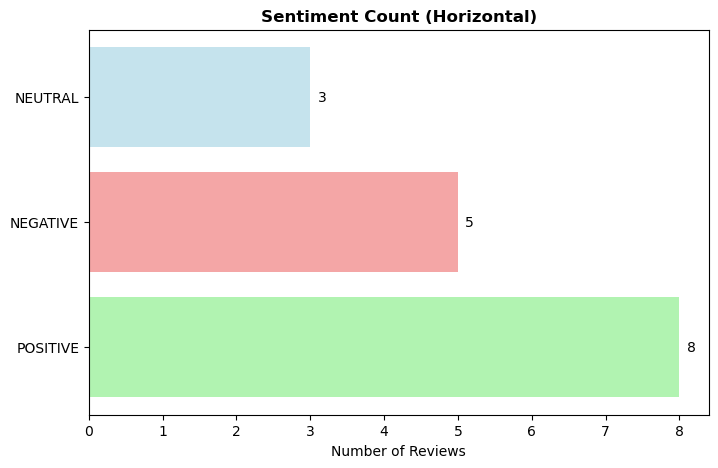

In [37]:
# Horizontal Bar Chart
plt.figure(figsize=(8, 5))
bars = plt.barh(list(sentiment_counts.keys()), list(sentiment_counts.values()), color=colors, alpha=0.7)
plt.title("Sentiment Count (Horizontal)", fontweight="bold")
plt.xlabel("Number of Reviews")

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', va='center')

plt.show()


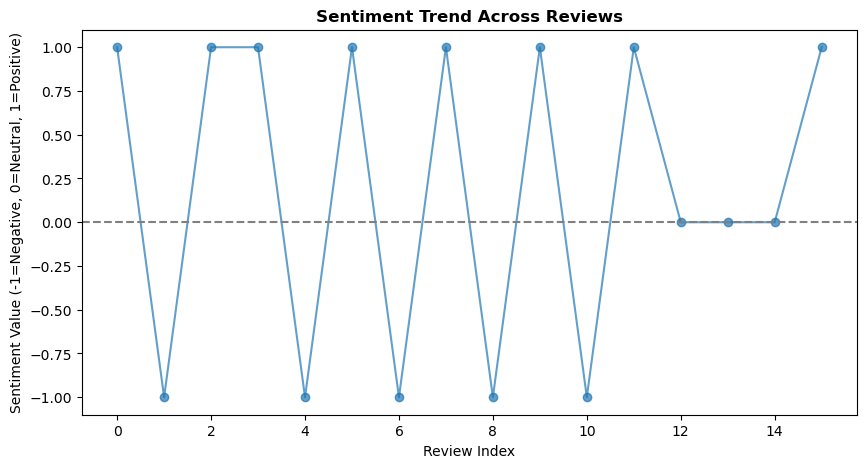

In [38]:
# Line chart for sentiment trend
plt.figure(figsize=(10, 5))
labels = [result['label'].upper() for result in results]
y_values = [1 if l=="POSITIVE" else -1 if l=="NEGATIVE" else 0 for l in labels]

plt.plot(range(len(y_values)), y_values, marker='o', linestyle='-', alpha=0.7)
plt.axhline(0, color="gray", linestyle="--")
plt.title("Sentiment Trend Across Reviews", fontweight="bold")
plt.xlabel("Review Index")
plt.ylabel("Sentiment Value (-1=Negative, 0=Neutral, 1=Positive)")
plt.show()


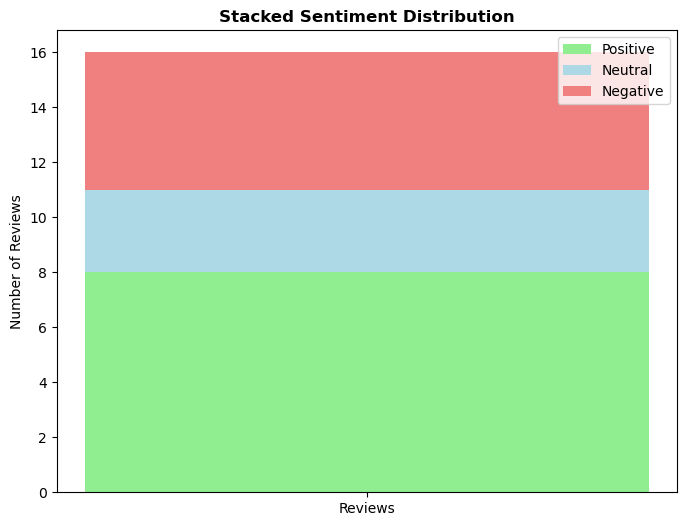

In [39]:
# Stacked Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(["Reviews"], [sentiment_counts["POSITIVE"]], color="lightgreen", label="Positive")
plt.bar(["Reviews"], [sentiment_counts["NEUTRAL"]], 
        bottom=[sentiment_counts["POSITIVE"]], color="lightblue", label="Neutral")
plt.bar(["Reviews"], [sentiment_counts["NEGATIVE"]], 
        bottom=[sentiment_counts["POSITIVE"] + sentiment_counts["NEUTRAL"]],
        color="lightcoral", label="Negative")

plt.title("Stacked Sentiment Distribution", fontweight="bold")
plt.ylabel("Number of Reviews")
plt.legend()
plt.show()


📦 Installing wordcloud libraries...
✅ wordcloud already installed!


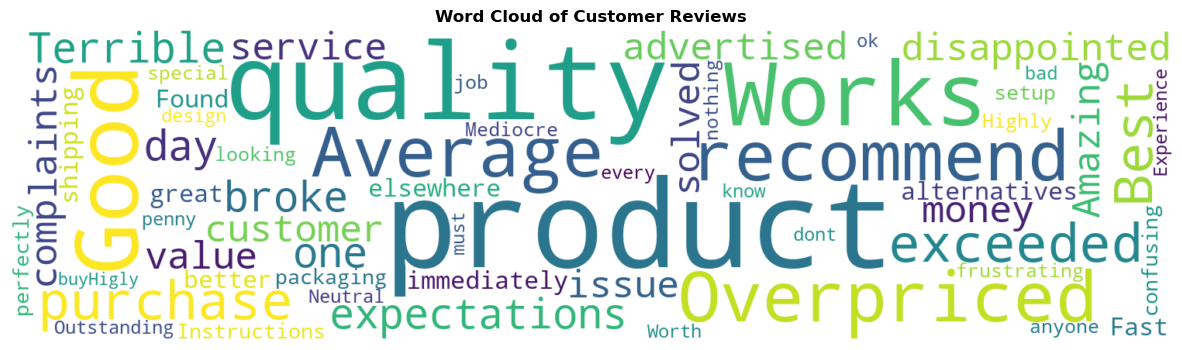

In [75]:
# Install required libraries
print("📦 Installing wordcloud libraries...")
try:
    import wordcloud
    print("✅ wordcloud already installed!")
except ImportError:
    !pip install wordcloud
    print("✅ Libraries installed successfully!")

# Import everything we need
from wordcloud import WordCloud

# Combine all reviews into one text
all_text = " ".join(customer_reviews)
#print(all_text)
# Generate word cloud
wc = WordCloud(width=1500, height=400, background_color="white", colormap="viridis").generate(all_text)

plt.figure(figsize=(15,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Customer Reviews", fontweight="bold")
plt.show()